[인프런 - 공공데이터로 파이썬 데이터 분석 시작하기](https://www.inflearn.com/course/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0) 의 질문에 대한 답변 입니다.

* [Reshaping and pivot tables — pandas documentation](https://pandas.pydata.org/docs/user_guide/reshaping.html)

In [1]:
# 전체 Data에서 필요한 부분만 뽑아 낸 다음에 , Tiny Data로 만들고 시각화 하는 과정에서 
# 언제는 unstack과 transpose를 사용하고, 언제는 reset_index를 사용하시는데
# 각각 언제 어떤 방법을 사용하는지 궁금합니다.

In [2]:
import pandas as pd
import seaborn as sns


# sns.set(font="Malgun Gothic")
sns.set(font="AppleGothic")

In [3]:
df_first = pd.read_csv("data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", 
                       encoding="cp949")
df_first.shape

(17, 22)

In [4]:
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [5]:
df = pd.melt(df_first, id_vars=["지역"])
df.head()

,지역,variable,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [6]:
group = df.groupby(["지역", "variable"])["value"].sum()
group

지역  variable
강원  2013년12월    6230
    2014년10월    6631
    2014년11월    6365
    2014년12월    6365
    2014년1월     6230
                ... 
충북  2015년4월     6790
    2015년5월     6805
    2015년6월     6682
    2015년7월     6601
    2015년8월     6603
Name: value, Length: 357, dtype: int64

In [7]:
group.index

MultiIndex([('강원', '2013년12월'),
            ('강원', '2014년10월'),
            ('강원', '2014년11월'),
            ('강원', '2014년12월'),
            ('강원',  '2014년1월'),
            ('강원',  '2014년2월'),
            ('강원',  '2014년3월'),
            ('강원',  '2014년4월'),
            ('강원',  '2014년5월'),
            ('강원',  '2014년6월'),
            ...
            ('충북',  '2014년8월'),
            ('충북',  '2014년9월'),
            ('충북',  '2015년1월'),
            ('충북',  '2015년2월'),
            ('충북',  '2015년3월'),
            ('충북',  '2015년4월'),
            ('충북',  '2015년5월'),
            ('충북',  '2015년6월'),
            ('충북',  '2015년7월'),
            ('충북',  '2015년8월')],
           names=['지역', 'variable'], length=357)

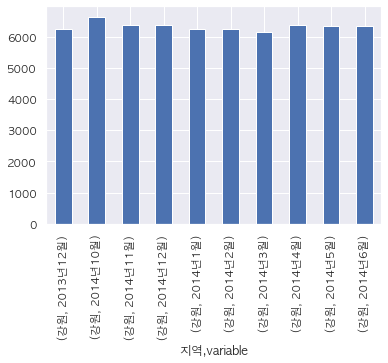

In [8]:
group[:10].plot.bar()

In [9]:
group_unstack = group.unstack()
group_unstack

variable,2013년12월,2014년10월,2014년11월,2014년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,...,2014년8월,2014년9월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
강원,6230,6631,6365,6365,6230,6230,6141,6373,6350,6350,...,6268,6419,6348,6350,6182,6924,6846,6986,7019,7008
경기,10855,10397,10356,10379,10855,10791,10784,10876,10646,10266,...,10134,10501,10391,10355,10469,10684,10685,10573,10518,10573
경남,6473,6881,7125,7332,6485,6502,6610,6599,6610,6615,...,6606,6767,7592,7588,7668,7683,7717,7715,7723,7665
경북,6168,6778,6881,6989,6168,6234,6317,6412,6409,6554,...,6563,6577,6992,6953,6997,7006,6966,6887,7035,7037
광주,6098,7707,7752,7748,7326,7611,7346,7346,7523,7659,...,7622,7802,7752,7756,7861,7914,7877,7881,8089,8231
대구,8080,8403,8439,8253,8080,8077,8101,8267,8274,8360,...,8370,8449,8327,8416,8441,8446,8568,8542,8542,8795
대전,8321,8038,8067,8067,8321,8321,8341,8341,8341,8333,...,8333,8048,8067,8067,8067,8145,8272,8079,8079,8079
부산,8111,9110,9208,9208,8111,9078,8965,9402,9501,9453,...,9411,9258,9204,9235,9279,9327,9345,9515,9559,9581
서울,18189,19759,20242,20269,17925,17925,18016,18098,19446,18867,...,19274,19404,20670,20670,19415,18842,18367,18374,18152,18443


In [10]:
group_unstack.T

지역,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
variable,,,,,,,,,,,,,,,,,
2013년12월,6230,10855,6473,6168,6098,8080,8321,8111,18189,7601,8090,10204,5678,6282,7674,6365,6589
2014년10월,6631,10397,6881,6778,7707,8403,8038,9110,19759,8527,8627,10016,5753,6581,7724,6831,6529
2014년11월,6365,10356,7125,6881,7752,8439,8067,9208,20242,8592,8891,10020,5768,6583,7724,6940,6724
2014년12월,6365,10379,7332,6989,7748,8253,8067,9208,20269,8560,8891,10020,5784,6583,7739,6989,6743
2014년1월,6230,10855,6485,6168,7326,8080,8321,8111,17925,7600,8090,10204,5678,6281,7900,6365,6589
2014년2월,6230,10791,6502,6234,7611,8077,8321,9078,17925,7532,8090,10408,5678,5946,7900,6379,6611
2014년3월,6141,10784,6610,6317,7346,8101,8341,8965,18016,7814,8153,10408,5696,5966,7900,6287,6625
2014년4월,6373,10876,6599,6412,7346,8267,8341,9402,18098,7908,8153,10000,5736,6277,7900,6552,6678
2014년5월,6350,10646,6610,6409,7523,8274,8341,9501,19446,7934,8153,9844,5656,6306,7900,6591,6598


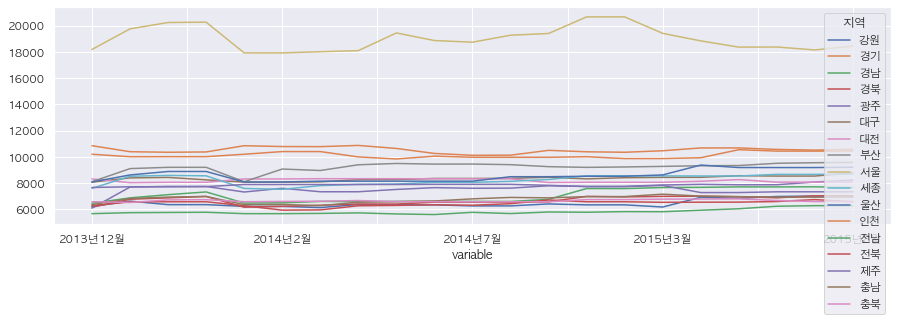

In [11]:
group_unstack.transpose().plot(figsize=(15, 4))

In [12]:
type(group)

pandas.core.series.Series

In [13]:
group.to_frame()

value
지역 variable       
강원 2013년12월   6230
   2014년10월   6631
   2014년11월   6365
   2014년12월   6365
   2014년1월    6230
...            ...
충북 2015년4월    6790
   2015년5월    6805
   2015년6월    6682
   2015년7월    6601
   2015년8월    6603

[357 rows x 1 columns]

In [14]:
pd.DataFrame(group)

value
지역 variable       
강원 2013년12월   6230
   2014년10월   6631
   2014년11월   6365
   2014년12월   6365
   2014년1월    6230
...            ...
충북 2015년4월    6790
   2015년5월    6805
   2015년6월    6682
   2015년7월    6601
   2015년8월    6603

[357 rows x 1 columns]

In [15]:
df_group = group.reset_index()
df_group

,지역,variable,value
0,강원,2013년12월,6230
1,강원,2014년10월,6631
2,강원,2014년11월,6365
3,강원,2014년12월,6365
4,강원,2014년1월,6230
...,...,...,...
352,충북,2015년4월,6790
353,충북,2015년5월,6805
354,충북,2015년6월,6682
355,충북,2015년7월,6601


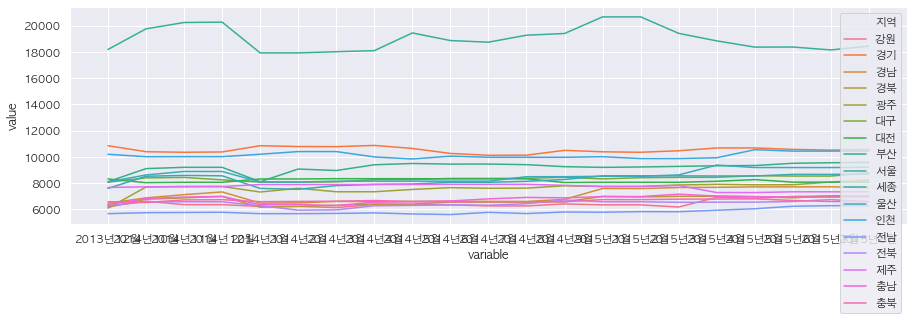

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_group, x="variable", y="value", hue="지역")